# Hierarcical Clustering(HC)

* Her bir data point bir cluster olacak
* En yakın 2 data pointi alıp bir cluster yap
* En yakın iki clusteri al bunları tek bir cluster yap
* Öncekini tekrarla

In [10]:
from IPython.display import Image
Image(url="./img/Hierarcical1.jpg")

* Distance mesafe: Eclidean distance: İki nokta arası mesafe
* 1- En yakın iki noktaya göre
* 2- En uzak iki noktaya göre
* 3- Mean'e göre
* 4- Centroidine göre (centroid aslında mean ile aynıdır)

## Dendogram
* Her hiyerartical bir stepini gösteren plottur.

In [11]:
Image(url="./img/Hierarcical2.jpg")

---

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Datayı Hazırlamak

In [22]:
x1 = np.random.normal(25,5,50) 
y1 = np.random.normal(25,5,50)

x2 = np.random.normal(55,5,50)
y2 = np.random.normal(60,5,50)

x3 = np.random.normal(55,5,50)
y3 = np.random.normal(15,5,50)

x = np.concatenate((x1,x2,x3), axis=0) # axis=0 => for column
y = np.concatenate((y1,y2,y3), axis=0) # axis=0 => for column

dictionary = {
    "x": x,
    "y": y
}

data = pd.DataFrame(dictionary)
data

,x,y
0,20.967509,24.369532
1,24.844581,26.272397
2,30.620723,20.724100
3,17.962754,30.444255
4,30.324629,39.805253
...,...,...
145,53.249984,10.447540
146,60.699790,4.790044
147,57.484728,24.059339
148,49.707721,8.093046


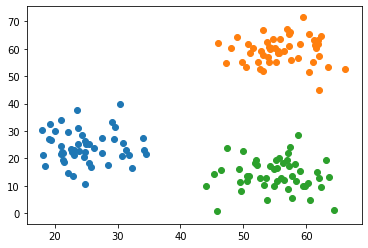

In [23]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

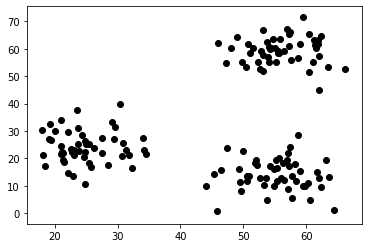

In [24]:
plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.show()

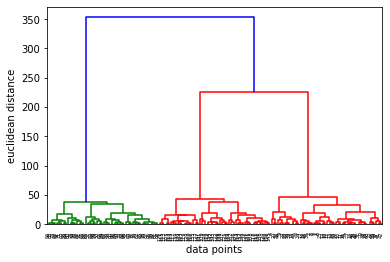

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data,method="ward") # ward => bizim cluster içindeki dağılımları minimizile eder
dendrogram(merg,leaf_rotation=90) # reaf rotation = hiç önemli bir şey değil. Alt noktanın eğimidir
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
cluster = hiyerartical_cluster.fit_predict(data)
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

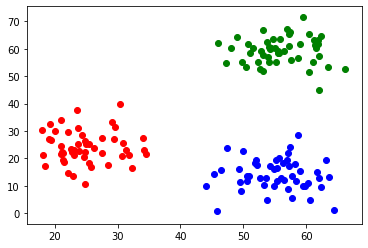

In [27]:
data["label"] = cluster

plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color="red")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color="green")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color="blue")
plt.show()